In [1]:
import numpy as np; import pandas as pd
import xarray as xr; import matplotlib.pyplot as plt;
%matplotlib inline

Dentro de loader hay muchas funciones y clases diferentes. Para empezar, creamos a crear un objeto de observaciones. Esto va a actuar como interface entre los datos y otras funciones.

In [2]:
    
"""
En esta clase vamos a incluir herramientas para cargar funciones, metodos, filepaths, formatos, etc. Para generar objetos de observaciones. 

Circulo: (centro) el modulo que contiene el acceso a la informacion. 
En el (1er anillo) del perimetro hay diferentes interfaces que configuran el acceso de otras funciones a los datos mismos. En el anillo de afuera hay funciones especificas de proyectos donde queremos generar y graficar los resultados.  

"""


class assemble:
    
        def __init__(self, obj_id, paths ):
            self.name = obj_id['name'];
            self.type = obj_id['type'];
            self.project = obj_id['project']; 
            self.limits = obj_id['limits'];
            self.files = paths; 
            
            # Now list properties that will be generated by class methods.
            self.grids = dict(); # they will be pandas, numpy, and xarray objects.
            self.vars = dict(); 
            
        def retrieve(self,filename, fileformat):
            
            if fileformat == 'netcdf':
                dataset = xr.open_dataset(filename);
            elif fileformat == 'mat':
                dataset = sio.loadmat(filename);

            return dataset
            
        def cyclethru(self):
            filelist = self.files.copy();
            print( [self.files[kk]  for kk in range(len(filelist))] );
            
        def storevar(self,filename,varname,limits='none'):
            # This method will:
            # 1. Load dataset from "file"
            dataset = [self.retrieve(filepath,'netcdf') for filepath in filename];
            
            # 2. Extract variable grid from "varname" in that dataset. 
            myvar = [dataset[kk][varname] for kk in range(len(filename))];
            #        If cut=True, load only a slice into memory 
            if isinstance(limits, dict):
                if limits['t0'] != 'none':
                    myvar = [myvar[kk].sel(time=slice(limits['t0'],limits['t1'])) for kk in range(len(filename))];
                
            # 3. Store variable grid inside of self.grids.
            self.grids[varname] = myvar;

            
        def gridtime(self, varname):
            gridobj = self.grids[varname];
            
            
        def printgrid(self,varname, axobj, axind, cut=False):
            mygrids = self.grids[varname[kk]];                                                                                                                                                                         
            
            # Put all in the same figure axis
            axobj[axind].pcolormesh(  )
            

In [23]:
limits_1 = {'t0':'2019-02-01','t1':'2019-02-07','lon':[134.7],'lat':[12.3]};
obj_1 = {'name':'SIO1','type': 'MOORING','project':'PISTON','limits':limits_1};


# Noel: adcpfolder = '/media/mydrive/PISTON/Moorings/SIO1/ADCP/'
adcpfolder = '/Documentos/CUCEI LIFI/Practicas Profesionales/modview/Archivos_Prueba/SIO1/'
filenames_1 = ['SIO1_3160.nc','SIO1_4021.nc','SIO1_11181.nc'];
files_1 = [adcpfolder + filenames_1[kk] for kk in range(len(filenames_1))]


In [24]:
obj_1

{'name': 'SIO1',
 'type': 'MOORING',
 'project': 'PISTON',
 'limits': {'t0': '2019-02-01',
  't1': '2019-02-07',
  'lon': [134.7],
  'lat': [12.3]}}

In [25]:
# Esta celula muestra un ejemplo especifico
SIO1 = assemble(obj_1, files_1)
vars2plot = ['u'];

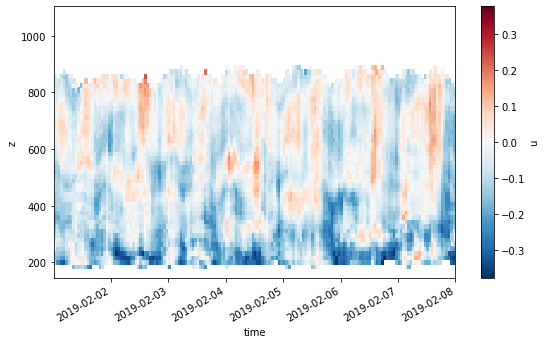

In [26]:
# Compilación de lo que no ocupa PISTON_Data para ver que lo otro si me corre 
SIO1.storevar(files_1,'u',limits_1)
SIO1.grids['u'][2].plot(figsize=[9,5])

In [11]:
Datonga = [SIO1.retrieve(files_1[i], 'netcdf') for i in range(len(files_1))]
Datonga[0]['u']
#SIO1.storevar
    

<xarray.DataArray 'u' (z: 57, time: 9192)>
[523944 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2018-09-19T00:30:00 ... 2019-10-06T23:30:0...
  * z        (z) float64 8.0 12.0 16.0 20.0 24.0 ... 220.0 224.0 228.0 232.0

In [13]:
SIO1.storevar(files_1[0],'u',limits_1)


# Import 
import sys
#Noel: sys.path.append('/media/mydrive/PhysOc/DataFinder/')
sys.path.append('/Documentos/CUCEI LIFI/Practicas Profesionales/modview/Archivos_Prueba/DataFinder/')
import PISTON_Data;
old_SIO1 = PISTON_Data.Mooring('SIO1');
# T2plot = old_SIO1.uvT['T'].sel(time=slice(limits_1['t0'],limits['t1']));

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [14]:
SIO1.grids['u'].plot(figsize=[10,6])
plt.contour( pd.to_datetime(T2plot.time.values), T2plot.depth, T2plot.values, levels=[19,21,23,25,27],colors='black' )

plt.ylim((180,50))

AttributeError: 'list' object has no attribute 'plot'

In [ ]:
T2plot

In [ ]:
adcp1 = SIO1.retrieve(files_1[0],'netcdf')

In [ ]:
SIO1.cyclethru()

In [ ]:
SIO1.girds['u']

In [ ]:
isinstance({'f':3,'x':1},dict)

In [10]:
isinstance(files_1,list)

True